# Assignment 2: CNN architectures {-}

This assignment aims at familiarizing you with training and testing the a CNN for an image classification task. You will go through the process of loading data, preprocessing images, building the CNN model, and evaluating its performance.

The assignment rqeuirements include:
- **2.1 (1 point)** Load the dataset.
- **2.2 (1 point)** Process, normalize, and resize the images.
- **2.3 (3 points)** Implement a CNN architecture selected from the models available in the TensorFlow Keras (from this list of models https://www.tensorflow.org/api_docs/python/tf/keras/applications, excluding VGG16 and VGG19).
- **2.4 (1 point)** Train and evaluate the CNN for the image classification task.
- **2.5 (2 points)** Modify the model by introducing enhancements such as skip connections or adjusting hyperparameters of the layers to improve its performance.
- **2.6 (1 point)** Train and evaluate the enhanced model on the test set.
- **2.7 (1 point)** Offer comments and observations regarding the impact of these modifications on the model’s effectiveness.


The dataset you will be working on is The CIFAR-10. This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy on the test, for example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named DL4AI-\<StudentID>-Assignment2 (e.g., DL4AI-2012345-Assigment2) and then compressed with the same name.


    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy will be rewarded an extra credit.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Note: to enable GPU training in Colab, go to Runtime > Change runtime type > Hardware acceleration > Choose GPU from the drop-down list.

!pip install tensorflow_datasets
!pip install keras
# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
# from keras.utils import np_utils
from keras import Model

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Get the full dataset (batch_size=-1) in NumPy arrays from the returned tf.Tensor object
cifar10_train = tfds.load(name="cifar10", split=tfds.Split.TRAIN, batch_size=-1 )
cifar10_test = tfds.load(name="cifar10", split=tfds.Split.TEST, batch_size=-1)

# Convert tfds dataset to numpy array records
cifar10_train = tfds.as_numpy(cifar10_train)
cifar10_test = tfds.as_numpy(cifar10_test)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.X0XZBR_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.X0XZBR_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


# Data processing and model training

In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Seperate feature X and label Y
X_train, Y_train = cifar10_train["image"], cifar10_train["label"]
X_test, Y_test = cifar10_test["image"], cifar10_test["label"]
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=99, test_size=0.2)

# Normalize the image data
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Specify the input image size and number of classes
img_width, img_height = 32, 32
nb_classes = 10

# Converts a class vector (integers) to binary class matrix to have one-hot encoding label. For example:
Y_train = keras.utils.to_categorical(Y_train, nb_classes)
Y_val = keras.utils.to_categorical(Y_val, nb_classes)
Y_test = keras.utils.to_categorical(Y_test, nb_classes)

In [4]:
# Initialize the model ResNet50 from tf.keras.applications
from keras.applications import ResNet50

model_Eff = ResNet50(
    weights='imagenet', # None for random initialization, or 'imagenet' for using pre-training on ImageNet.
    include_top=False, # Whether to include the 3 fully-connected layers at the top of the network.
    input_shape=(img_width, img_height, 3)) # Specify input input_shape

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
print("Training set shape: " + str(X_train.shape))
print("validation set shape: " + str(X_val.shape))
print("Test set shape: " + str(X_test.shape))

Training set shape: (40000, 32, 32, 3)
validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [6]:
model_Eff.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [7]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, BatchNormalization, Dropout

model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

last_layer = model_resnet.get_layer('conv2_block1_2_conv').output

last_layer.shape




(None, 8, 8, 64)

In [8]:
from keras.layers import Input, Conv2D, Add, BatchNormalization, Activation, Flatten, Dense, Dropout
from keras.models import Model

def residual_block(x, filters, stride=1):
    shortcut = x
    # First convolution layer
    x = Conv2D(filters, kernel_size=3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolution layer
    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(16, kernel_size=3, padding='same')(inputs)  # Initial conv layer
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Adding residual blocks
    for _ in range(9):  # 9 residual blocks
        x = residual_block(x, 16)

    x = residual_block(x, 32, stride=2)  # First block with downsampling
    for _ in range(9):  # 9 residual blocks at 32 filters
        x = residual_block(x, 32)

    x = residual_block(x, 64, stride=2)  # Second block with downsampling
    for _ in range(9):  # 9 residual blocks at 64 filters
        x = residual_block(x, 64)

    # Final layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=inputs, outputs=x)
    return model

# Parameters
input_shape = (32, 32, 3)
num_classes = 10

# Build and compile the model
model_resnet_cifar10 = build_resnet(input_shape, num_classes)
model_resnet_cifar10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_resnet_cifar10.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 16)     │            448 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 16)     │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 16)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 16)     │          2,320 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 16)     │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 16)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 16)     │          2,320 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 16)     │             64 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 16)     │              0 │ batch_normalization_2… │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 16)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 16)     │          2,320 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 16)     │             64 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 32, 32, 16)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 16)     │          2,320 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 16)     │             64 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 3,057,418 (11.66 MB)

 Trainable params: 3,052,778 (11.65 MB)

 Non-trainable params: 4,640 (18.12 KB)

In [9]:
# Compile the model with Adam optimizer
model_resnet_cifar10.compile(
    loss='categorical_crossentropy',  # Categorical cross-entropy as loss function
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer with a specified learning rate
    metrics=['accuracy']  # Metric to evaluate the model performance
)


In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_training = model_resnet_cifar10.fit(X_train, Y_train,
                           epochs=30,
                           batch_size=64,
                           validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 59ms/step - accuracy: 0.1101 - loss: 9.4462 - val_accuracy: 0.1101 - val_loss: 2.2883
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.1327 - loss: 2.2734 - val_accuracy: 0.2857 - val_loss: 1.9318
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.2730 - loss: 1.9345 - val_accuracy: 0.2517 - val_loss: 2.1335
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.3412 - loss: 1.7617 - val_accuracy: 0.4045 - val_loss: 1.5702
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.3681 - loss: 1.6849 - val_accuracy: 0.2188 - val_loss: 2.5302
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4107 - loss: 1.6018 - val_accuracy: 0.4402 - val_loss: 1.5414
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.4368 - loss: 1.5553 - val_accuracy: 0.3548 - val_loss: 1.9521
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.4621 - loss: 1.4868 -

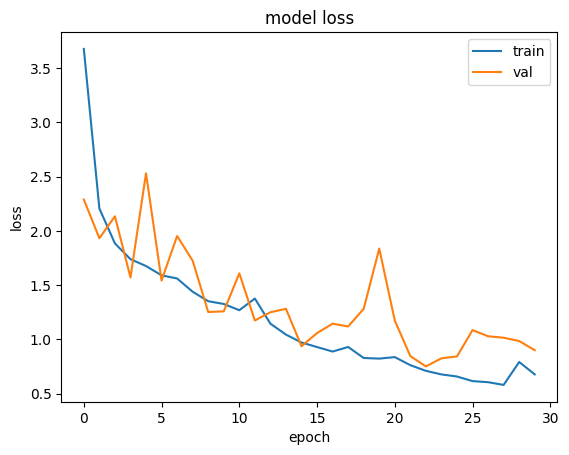

In [11]:
# Visualize the training and validation loss over epochs
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

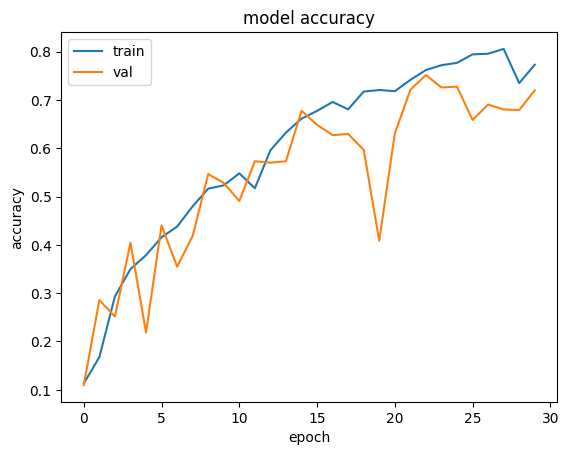

In [12]:
# Visualize the training and validation accuracy over epochs
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
# Evaluate the model prediction on a data sample
pred = model_resnet_cifar10.predict(X_test[:1]) # Make prediction on a data sample
print("Model prediction: " + str(pred)) # Model prediction
print("True label: " + str(Y_test[:1])) # True label

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Model prediction: [[0.04504482 0.00192779 0.1854738  0.16272292 0.11363211 0.11605997
  0.00247082 0.36732993 0.0022441  0.0030939 ]]
True label: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [14]:
# Evaluate the model prediction on the entire test set
preds = model_resnet_cifar10.predict(X_test) # Make prediction on the entire test set
preds_index = np.argmax(preds, axis=1) # Get the index of maximum class probability of each of the data sample
label_index = np.argmax(Y_test, axis=1) # Get the index of maximum class label

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


In [15]:
# Compare the predictions with the true labels
comparison_result = np.equal(preds_index, label_index) # Return the comparison result which is an array of True/False.

# Calculate the number of correct predictions (True values in the comparison result array).
correct_preds = comparison_result.sum() # Compute the sum of elements across dimensions of a tensor.

# Show accuracy
print("Number of correct predictions: " + str(correct_preds))
print("Test accuracy: " + str(correct_preds/X_test.shape[0]))

Number of correct predictions: 7460
Test accuracy: 0.746


In [16]:
# Evaluate the model accuracy using the function model.evaluate()
# model_eval = model_vgg16_cifar10.evaluate(X_test, Y_test, batch_size=4096)
model_eval = model_resnet_cifar10.evaluate(X_test, Y_test, batch_size=4096)
print("List of metrics" + str(model_resnet_cifar10.metrics_names)) # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().

print("Test loss: " + str(model_eval[0])) # Test loss
print("Test accuracy: " + str(model_eval[1])) # Test accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7466 - loss: 0.7658
List of metrics['loss', 'compile_metrics']
Test loss: 0.7682267427444458
Test accuracy: 0.7459999918937683


Comment

After several training sessions, the model achieved a test accuracy of 74.6% on the CIFAR-10 dataset using a custom ResNet architecture. The model consists of 27 blocks, organized into three stages with increasing filter sizes of 16, 32, and 64. Each residual block comprises two convolutional layers, followed by Batch Normalization and ReLU activation functions. This structure helps preserve gradient flow and mitigates the vanishing gradient problem.

The use of the Add() function to connect the input to the output within each block facilitates residual learning, allowing the network to effectively learn the "residual" mapping. Additionally, downsampling is implemented with a stride of 2 in the first block of each stage (for both 32 and 64 filters) to reduce the spatial dimensions of the feature maps, thereby decreasing the computational load.

Following the residual blocks, the architecture includes a fully connected layer with 512 units, followed by a ReLU activation and a dropout layer with a dropout rate of 0.5. While this result does not yet meet current benchmarks, it represents a solid performance for the model. There is potential for improvement through fine-tuning parameters and exploring deeper model variants, such as increasing the number of filters per layer.